In [ ]:
import xarray as xr
import numpy as np
import cftime
import nc_time_axis
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import ticker, cm
from cftime import datetime 
import matplotlib.colors as colors
import math
import random
import matplotlib.cm as mcm
jet = mcm.get_cmap('jet')
import cartopy.crs as ccrs # CRS stands for "Coordinate reference systems" for map projection
from cartopy.crs import PlateCarree
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from dateutil import tz
import pytz
import time
from time import process_time
%matplotlib inline 


#================================  JW ======================================

filename="Nc_Files/Jianfei_WACCMX_files/waccmx_Fe_Fep_01.nc"
filename2="Nc_Files/Jianfei_WACCMX_files/waccmx_Z3_T_e_01.nc"

M = filename[-9:]
Metal=M[0:2]

ds = xr.open_dataset(filename)
lon = ds.variables['lon']
lat = ds.variables['lat']
lev = ds.variables['lev']
dst = ds.transpose("lev", ...)
Mt = dst.variables[str(Metal)]
Mpt = dst.variables[str(Metal)+'p']

timee = ds.variables['time']
timee = timee[0:121:24]        
times = xr.cftime_range(start="0001-01-01", periods=6, freq="1D", calendar="noleap")
times2 = ds["time"].dt.strftime("%Y%m%d %H:%M")
times2 = times2[0:121:24]

ds2 = xr.open_dataset(filename2)
ds2t = ds2.transpose("lev", ...)
temp = ds2t.variables['T']
elect = ds2t.variables['e']

geopH = ds2t.variables['Z3'] / 1000 #m-> km
geopH = geopH[:,0:121:24,:,:]
Zavg = geopH.mean(('time','lat', 'lon'))


In [ ]:
#================================  JW ======================================

# Slice arrays (lev, altitude) between chosen range
lev_sl_idx_min = 42
lev_sl_idx_max = 66

#======================================================

lev_sl = lev[lev_sl_idx_min:lev_sl_idx_max+1]

lev_sl_ind_min = lev[lev_sl_idx_min] 
lev_sl_ind_max = lev[lev_sl_idx_max] 
lev_sl_str = str("%.1e" % lev_sl_ind_max) + 'hPa : ' + str("%.1e" % lev_sl_ind_min) + 'hPa'

Zavg_sl = Zavg[lev_sl_idx_min:lev_sl_idx_max+1]
Zavg_sl_min = Zavg[lev_sl_idx_min] 
Zavg_sl_max = Zavg[lev_sl_idx_max]
Zavg_sl_str = str("%.0f" % Zavg_sl_max) + 'km : ' + str("%.0f" % Zavg_sl_min) + 'km'

print('Array lev = ' + lev_sl_str + ' (approx ' + Zavg_sl_str + ')'   )

geopH_sl = geopH[lev_sl_idx_min:lev_sl_idx_max+1,:,:,:]

#======================================================

Mt = Mt[lev_sl_idx_min:lev_sl_idx_max+1,0:121:24,:,:]
Mpt = Mpt[lev_sl_idx_min:lev_sl_idx_max+1,0:121:24,:,:]

elect = elect[lev_sl_idx_min:lev_sl_idx_max+1,0:121:24,:,:]
tempe = temp[lev_sl_idx_min:lev_sl_idx_max+1,0:121:24,:,:]

#======================================================

# VMR to number density calculation
Mtdens = ( Mt * 1e-6 * 100 * lev_sl ) / (1.380503e-23 * tempe)
Mptdens = ( Mpt * 1e-6 * 100 * lev_sl ) / (1.380503e-23 * tempe)
edens = ( elect * 1e-6 * 100 * lev_sl ) / (1.380503e-23 * tempe)

Array lev = 6.0e-03hPa : 1.5e-05hPa (approx 81km : 126km)


In [4]:
#================================  TEST ======================================

filename_test = 'Nc_Files/arc4/FX2000_metal_ion_tr.cam.h1.0001-01-01-00000.nc'
dstest = xr.open_dataset(filename_test)
#dstest

lontest = dstest.variables['lon']
lattest = dstest.variables['lat']
levtest = dstest.variables['lev']

dstestt = dstest.transpose("lev", ...)
Mttest = dstestt.variables[str(Metal)]
Mpttest = dstestt.variables[str(Metal)+'p']
temptest = dstestt.variables['T']
electtest = dstestt.variables['e']
geopHtest = dstestt.variables['Z3'] / 1000 #m-> km
Zavgtest = geopH.mean(('time','lat', 'lon'))

timeetest = dstest.variables['time']
timestest = xr.cftime_range(start="0001-01-01", periods=6, freq="1D", calendar="noleap")
times2test = dstest["time"].dt.strftime("%Y%m%d %H:%M")

In [5]:
#================================  TEST ======================================

# Slice arrays (lev, altitude) between chosen range

lev_sltest = levtest[lev_sl_idx_min:lev_sl_idx_max+1]

lev_sltest_ind_min = levtest[lev_sl_idx_min] 
lev_sltest_ind_max = levtest[lev_sl_idx_max] 
lev_sltest_str = str("%.1e" % lev_sltest_ind_max) + 'hPa : ' + str("%.1e" % lev_sltest_ind_min) + 'hPa'

Zavg_sltest = Zavgtest[lev_sl_idx_min:lev_sl_idx_max+1]
Zavg_sltest_min = Zavg[lev_sl_idx_min] 
Zavg_sltest_max = Zavg[lev_sl_idx_max]
Zavg_sltest_str = str("%.0f" % Zavg_sltest_max) + 'km : ' + str("%.0f" % Zavg_sltest_min) + 'km'

print('Array lev = ' + lev_sltest_str + ' (approx ' + Zavg_sltest_str + ')'   )

geopH_sltest = geopHtest[lev_sl_idx_min:lev_sl_idx_max+1,:,:,:]

#======================================================

Mttest = Mttest[lev_sl_idx_min:lev_sl_idx_max+1,:,:,:]
Mpttest = Mpttest[lev_sl_idx_min:lev_sl_idx_max+1,:,:,:]

electtest = electtest[lev_sl_idx_min:lev_sl_idx_max+1,:,:,:]
temptest = temptest[lev_sl_idx_min:lev_sl_idx_max+1,:,:,:]

#======================================================


# VMR to number density calculation
Mtdenstest = ( Mttest * 1e-6 * 100 * lev_sltest ) / (1.380503e-23 * temptest)
Mptdenstest = ( Mpttest * 1e-6 * 100 * lev_sltest ) / (1.380503e-23 * temptest)
edenstest = ( electtest * 1e-6 * 100 * lev_sltest ) / (1.380503e-23 * temptest)

Array lev = 6.0e-03hPa : 1.5e-05hPa (approx 81km : 126km)


In [164]:
#================================  JW & Test Run ======================================

#---------------------------------------------------------------------------------------------
#-----------------------------------Lev-LT plot setup ----------------------------------------
#---------------------------------------------------------------------------------------------
print('Lev-LT plot setup:')

lat_plot_idx = 21 #=-50.2   #37 #=-19.9    
lat_plot = lat[lat_plot_idx]
lat_plot_str = str("%.1f" % lat_plot) 
print('      Plot lat = ' + lat_plot_str)
print('----------------------------------------')
lev_sl_idx_plot_min = 0
lev_sl_idx_plot_max = 24
lev_sl_plot_min = lev_sl[lev_sl_idx_plot_min]
lev_sl_plot_max = lev_sl[lev_sl_idx_plot_max]
lev_sl_plot_min_str = str("%.1e" % lev_sl_plot_min) + ' hPa'
lev_sl_plot_max_str = str("%.1e" % lev_sl_plot_max) + ' hPa'
print('      Plot Lev = ' + lev_sl_plot_max_str + ' : ' + lev_sl_plot_min_str)

Zavg_sl_plot_min = Zavg_sl[lev_sl_idx_plot_min]
Zavg_sl_plot_max = Zavg_sl[lev_sl_idx_plot_max]
Zavg_sl_plot_min_str = str("%.0f" % Zavg_sl_plot_min) + ' km'
Zavg_sl_plot_max_str = str("%.0f" % Zavg_sl_plot_max) + ' km'
print('      Approx Z = ' + Zavg_sl_plot_max_str + ' : ' + Zavg_sl_plot_min_str)

Zavg_sl_plott = Zavg_sl[lev_sl_idx_plot_min:lev_sl_idx_plot_max+1]
Zavg_sl_plott = Zavg_sl_plott.to_numpy()
Zavg_sl_plottt = np.round_(Zavg_sl_plott, decimals=0)
print('----------------------------------------')

time_plot_idx = 5
print('      Plot time = ' + str(times[time_plot_idx]) )


#-------------------Set up Local Time Ticks-------------------------------

timeconv = lon / 15
timeconv_plot = timeconv.to_numpy() 
timeconv_plot_ticks = np.arange(0,25, dtype=float)

Lev-LT plot setup:
      Plot lat = -50.2
----------------------------------------
      Plot Lev = 6.0e-03 hPa : 1.5e-05 hPa
      Approx Z = 81 km : 126 km
----------------------------------------
      Plot time = 0001-01-06 00:00:00


/tmp/ipykernel_3745927/1465089684.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(Zavg_sl_plottt[lev_sl_idx_plot_max:lev_sl_idx_plot_min:-5])
/tmp/ipykernel_3745927/1465089684.py:49: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = fig.colorbar(C, pad=0.12,ticks=ticks[::4])#,format=ticker.FuncFormatter(fmt))#fraction=0.023,


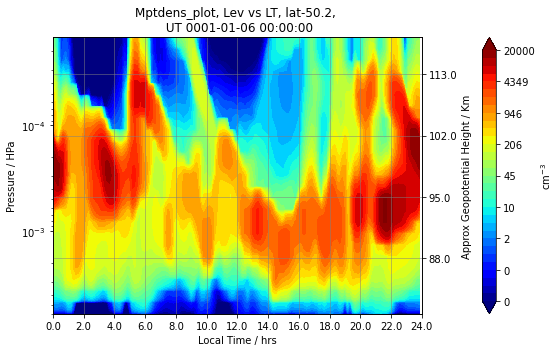

In [165]:
#================================  JW ======================================
#Set up plot variables

Mtdens_plot = Mtdens[:,time_plot_idx,lat_plot_idx,:]
Mptdens_plot = Mptdens[:,time_plot_idx,lat_plot_idx,:]
edens_plot = edens[:,time_plot_idx,lat_plot_idx,:]

#======================================================

#ticks = np.geomspace(1, 175000, 33) #e-
ticks = np.geomspace(0.1, 20000, 33) #Fe


fig, ax = plt.subplots(figsize=(8, 5))

C = ax.contourf(timeconv, lev_sl, Mptdens_plot, 
                 levels=ticks,
                 locator=ticker.LogLocator(),
                 extend='both',
                 cmap=jet)

ax.set_yscale('log')
ax.set_ylabel('Pressure / HPa')
ax.set_ylim(lev_sl_plot_max, lev_sl_plot_min) 

ax2 = ax.twinx()
ax2.set_ylabel('Approx Geopotential Height / Km')
ax2.set_ylim(Zavg_sl_plot_max,Zavg_sl_plot_min)
ax2.set_yticklabels(Zavg_sl_plottt[lev_sl_idx_plot_max:lev_sl_idx_plot_min:-5])


ax.set_xlabel('Local Time / hrs')
ax.set_xticks(np.linspace(0,24,13)) 
ax.set_xticklabels(timeconv_plot_ticks[::2]) 

ax.set_title('Mptdens_plot, Lev vs LT, lat' + lat_plot_str + ', \n UT ' + str(times[time_plot_idx]) )

ax.grid(axis='x',color = 'grey', linestyle = '-', linewidth = 0.5)
#ax.grid(axis='y',color = 'grey', linestyle = '-', linewidth = 0.5)
plt.grid(axis='y',color = 'grey', linestyle = '-', linewidth = 0.5)

#------------------
def fmt(x, pos):
    a, b = '{:.1e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

cbar = fig.colorbar(C, pad=0.12,ticks=ticks[::4])#,format=ticker.FuncFormatter(fmt))#fraction=0.023, 
#-------------------

cbar.set_label(r'cm$^{-3}$')

figname= 'JW_Fep: Lev vs LT, lat' + lat_plot_str + ' UT ' + str(times[time_plot_idx]) + '.png'
plt.tight_layout()
plt.savefig('./Figures/Jianfei_run/Test_run_comparison/'+ str(figname), dpi = 400) #


/tmp/ipykernel_3745927/567388898.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(Zavg_sl_plottt[lev_sl_idx_plot_max:lev_sl_idx_plot_min:-5])
/tmp/ipykernel_3745927/567388898.py:49: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = fig.colorbar(C, pad=0.12,ticks=ticks[::4])#,format=ticker.FuncFormatter(fmt))#fraction=0.023,


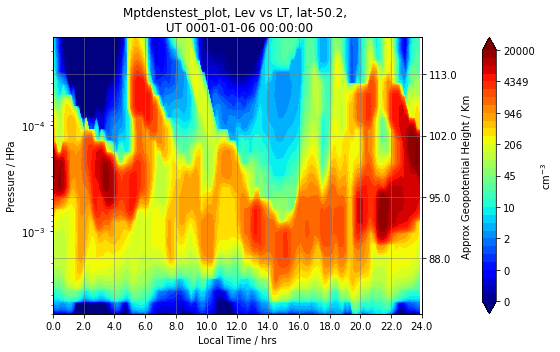

In [166]:
#================================  TEST ======================================

#Set up plot variables

Mtdenstest_plot = Mtdenstest[:,time_plot_idx,lat_plot_idx,:]
Mptdenstest_plot = Mptdenstest[:,time_plot_idx,lat_plot_idx,:]
edenstest_plot = edenstest[:,time_plot_idx,lat_plot_idx,:]

#======================================================

#ticks = np.geomspace(1, 175000, 33) #e-
ticks = np.geomspace(0.1, 20000, 33) #Fe

fig, ax = plt.subplots(figsize=(8, 5))

C = ax.contourf(timeconv, lev_sl, Mptdenstest_plot, 
                 levels=ticks,
                 locator=ticker.LogLocator(),
                 extend='both',
                 cmap=jet)

ax.set_yscale('log')
ax.set_ylabel('Pressure / HPa')
ax.set_ylim(lev_sl_plot_max, lev_sl_plot_min) 

ax2 = ax.twinx()
ax2.set_ylabel('Approx Geopotential Height / Km')
ax2.set_ylim(Zavg_sl_plot_max,Zavg_sl_plot_min)
ax2.set_yticklabels(Zavg_sl_plottt[lev_sl_idx_plot_max:lev_sl_idx_plot_min:-5])


ax.set_xlabel('Local Time / hrs')
ax.set_xticks(np.linspace(0,24,13)) 
ax.set_xticklabels(timeconv_plot_ticks[::2]) 

ax.set_title('Mptdenstest_plot, Lev vs LT, lat' + lat_plot_str + ', \n UT ' + str(times[time_plot_idx]) )

ax.grid(axis='x',color = 'grey', linestyle = '-', linewidth = 0.5)
#ax.grid(axis='y',color = 'grey', linestyle = '-', linewidth = 0.5)
plt.grid(axis='y',color = 'grey', linestyle = '-', linewidth = 0.5)

#------------------
def fmt(x, pos):
    a, b = '{:.1e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

cbar = fig.colorbar(C, pad=0.12,ticks=ticks[::4])#,format=ticker.FuncFormatter(fmt))#fraction=0.023, 
#-------------------

cbar.set_label(r'cm$^{-3}$')

figname= 'Test_Fep: Lev vs LT, lat' + lat_plot_str + ' UT ' + str(times[time_plot_idx]) + '.png'
plt.tight_layout()
plt.savefig('./Figures/Jianfei_run/Test_run_comparison/'+ str(figname), dpi = 400) #


In [237]:


#-----------------------------------Lat-LT plot setup ----------------------------------------
#---------------------------------------------------------------------------------------------
#print('Lat-LT plot setup:')
lev_sl_idx_plot2 = 14    #14 4.9e-04hPa~95km  #8 1.1e-04hPa~105km  #4 4.0e-05 hPa~114km

lev_sl_plot2 = lev_sl[lev_sl_idx_plot2]
lev_sl_plot2_str = str("%.1e" % lev_sl_plot2) + ' hPa'
print('Plot Lev = ' + lev_sl_plot2_str )

Zavg_sl_plot2 = Zavg_sl[lev_sl_idx_plot2]
Zavg_sl_plot2_str = str("%.0f" % Zavg_sl_plot2) + ' km'
print('Approx Z = ' + Zavg_sl_plot2_str )

print('----------------------------------------')

time_plot2_idx = 2
print('      Plot time = ' + str(times[time_plot2_idx]) )

Plot Lev = 4.9e-04 hPa
Approx Z = 95 km
----------------------------------------
      Plot time = 0001-01-03 00:00:00


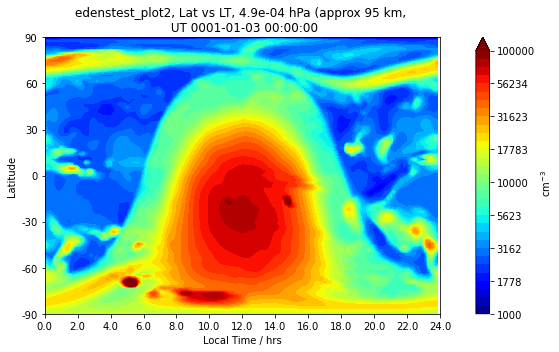

In [238]:
#================================  TEST ======================================

#Set up plot variables

Mtdenstest_plot2 = Mtdenstest[lev_sl_idx_plot2,time_plot2_idx,:,:]
Mptdenstest_plot2 = Mptdenstest[lev_sl_idx_plot2,time_plot2_idx,:,:]
edenstest_plot2 = edenstest[lev_sl_idx_plot2,time_plot2_idx,:,:]

#======================================================

ticks = np.geomspace(1000, 100000, 33) #e
#ticks = np.geomspace(0.1, 10000, 33) #e

fig, ax = plt.subplots(figsize=(8, 5))

C = ax.contourf(timeconv, lat, edenstest_plot2, 
                 levels=ticks,
                 locator=ticker.LogLocator(),
                 extend='max',
                 cmap=jet)

ax.set_ylabel('Latitude')
ax.set_yticks(np.linspace(-90,90, 7)) 
ax.set_yticklabels((-90,-60,-30,0,30,60,90)) 

ax.set_xlabel('Local Time / hrs')
ax.set_xticks(np.linspace(0,24,13)) 
ax.set_xticklabels(timeconv_plot_ticks[::2]) 

ax.set_title('edenstest_plot2, Lat vs LT, ' + lev_sl_plot2_str 
             + ' (approx '+ Zavg_sl_plot2_str 
             + ', \n UT ' + str(times[time_plot2_idx]))

#ax.grid(axis='x',color = 'grey', linestyle = '-', linewidth = 0.5)
#plt.grid(axis='y',color = 'grey', linestyle = '-', linewidth = 0.5)

#------------------
def fmt(x, pos):
    a, b = '{:.1e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

cbar = fig.colorbar(C, pad=0.07,ticks=ticks[::4])#,format=ticker.FuncFormatter(fmt))#fraction=0.023, 
#-------------------

cbar.set_label(r'cm$^{-3}$')

figname= 'Test_e-: Lat vs LT, ' + lev_sl_plot2_str + ' UT ' + str(times[time_plot2_idx]) + '.png'
plt.tight_layout()
plt.savefig('./Figures/Jianfei_run/Test_run_comparison/'+ str(figname), dpi = 400) #


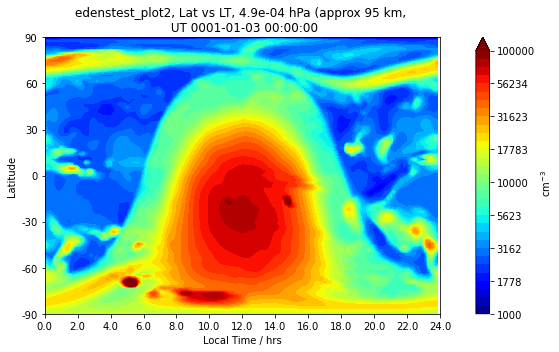

In [239]:
#================================  JW ======================================

#Set up plot variables

Mtdens_plot2 = Mtdens[lev_sl_idx_plot2,time_plot2_idx,:,:]
Mptdens_plot2 = Mptdens[lev_sl_idx_plot2,time_plot2_idx,:,:]
edens_plot2 = edens[lev_sl_idx_plot2,time_plot2_idx,:,:]

#======================================================

ticks = np.geomspace(1000, 100000, 33) #e
#ticks = np.geomspace(0.1, 5000, 33) #Fe

fig, ax = plt.subplots(figsize=(8, 5))

C = ax.contourf(timeconv, lat, edenstest_plot2, 
                 levels=ticks,
                 locator=ticker.LogLocator(),
                 extend='max',
                 cmap=jet)

ax.set_ylabel('Latitude')
ax.set_yticks(np.linspace(-90,90, 7)) 
ax.set_yticklabels((-90,-60,-30,0,30,60,90)) 

ax.set_xlabel('Local Time / hrs')
ax.set_xticks(np.linspace(0,24,13)) 
ax.set_xticklabels(timeconv_plot_ticks[::2]) 

ax.set_title('edenstest_plot2, Lat vs LT, ' + lev_sl_plot2_str 
             + ' (approx '+ Zavg_sl_plot2_str 
             + ', \n UT ' + str(times[time_plot2_idx]))

#ax.grid(axis='x',color = 'grey', linestyle = '-', linewidth = 0.5)
#plt.grid(axis='y',color = 'grey', linestyle = '-', linewidth = 0.5)

#------------------
def fmt(x, pos):
    a, b = '{:.1e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

cbar = fig.colorbar(C, pad=0.07,ticks=ticks[::4])#,format=ticker.FuncFormatter(fmt))#fraction=0.023, 
#-------------------

cbar.set_label(r'cm$^{-3}$')

figname= 'JW_e-: Lat vs LT, ' + lev_sl_plot2_str + ' UT ' + str(times[time_plot2_idx]) + '.png'
plt.tight_layout()
plt.savefig('./Figures/Jianfei_run/Test_run_comparison/'+ str(figname), dpi = 400) #
